In [1]:
import pickle as pkl
import numpy as np
import Simulation.pys.full_sim.Catalogue_one_shell as cata_shell
import Simulation.pys.para.model_para as Mp
import Simulation.pys.fast_sim.final_sampling_pixel_acc as sam
from importlib import reload
import matplotlib.pyplot as plt
import Simulation.pys.others.Statistics_acc as St
import Simulation.pys.full_sim.cosmo2cl as Cl
import healpy as hp


100%|██████████| 40/40 [00:01<00:00, 29.78it/s]


In [2]:
with open('../../data/test_model/test_dust_effect.pkl', 'rb') as f:
    dust_effect = pkl.load(f)
    
with open('../../data/test_model/test_EBV_Rv_pixel_list.pkl', 'rb') as f:
    EBV_Rv_pixel = pkl.load(f)
    
with open('../../data/test_model/test_cosmo_pack.pkl', 'rb') as f:
    cosmo_pack = pkl.load(f)
    
usable_label = list(EBV_Rv_pixel.keys())

In [3]:
len(usable_label)

700

In [4]:
Ncount_Exp_shell_map = cata_shell.ExpNcount_map_shells(cosmo_pack["density_map"], Mp.Ncount_hist, 2e8)

In [5]:
reload(sam)
hist_quick, mask_quick = sam.all_shell_box(usable_label[:],
                                           EBV_Rv_pixel,Mp.SFD<0.2,
                                           dust_effect["dust"],
                                           Ncount_Exp_shell_map)

100%|██████████| 700/700 [00:16<00:00, 43.57it/s] 


In [6]:
np.mean(mask_quick)

np.float64(0.7419904073079427)

In [7]:
with open('../../data/test_model/test_full_sim_result_pack1.pkl', 'rb') as f:
    result_pack = pkl.load(f)
cosmo = result_pack["cosmo_pack"]
dust = result_pack["dust_pack"]
data = result_pack["data"]
mask = result_pack['mask']
dust_completed = St.sim_data(data['dust'][:,:,1:-1], mask, print_ = True)
clean_completed = St.sim_data(data['clean'][:,:,1:-1],mask, print_ = True)

82203688.0 objects sampled!
85998139.0 objects sampled!


In [8]:
dust_quick = St.sim_data(hist_quick[:,:, 1:-1], mask_quick, print_=True)

79594972.0 objects sampled!


In [9]:
np.shape(hist_quick[:,:, 1:-1])

(40, 3145728, 5)

In [13]:
# slow_map = data['dust']
# quick_map = hist_quick
# import tqdm
# 
# for i in tqdm.tqdm(range(0, 371)):
#     redshift_id = 10
#     mask_pixel = EBV_Rv_mask[usable_label[i]]
#     quick_map_pixel = quick_map[:,mask_pixel,:]
#     dis_avg = np.mean(quick_map_pixel[redshift_id,:,:], axis = 0)
#     plt.plot(dis_avg/np.sum(dis_avg), "red")
# 
#     
# 
# 
# plt.figure()
#     
# for i in tqdm.tqdm(range(0, 370)):   
#     redshift_id = 10
#     mask_pixel = EBV_Rv_mask[usable_label[i]]
#     slow_map_pixel = slow_map[:,mask_pixel,:]
#     slow_avg = np.mean(slow_map_pixel[redshift_id,:,:], axis = 0)
#     plt.plot(slow_avg/np.sum(slow_avg), "blue", alpha = 1)
# 
#     

In [14]:
# slow_map = data['dust']
# quick_map = hist_quick
# import tqdm
# 
#     
# fake_dust_law = {}
# for i in tqdm.tqdm(range(0, 371)): 
#     redshift_data = []
#     for redshift_id in range(0, 40):
#         mask_pixel = EBV_Rv_mask[usable_label[i]]
#         slow_map_pixel = slow_map[:,mask_pixel,:]
#         slow_avg = np.sum(slow_map_pixel[redshift_id,:2000,:], axis = 0)
#         redshift_data.append(slow_avg)
#     fake_dust_law[usable_label[i]] = np.array(redshift_data)
#         #plt.plot(slow_avg/np.sum(slow_avg), "blue", alpha = 0.01)
# 
#     

In [10]:
shell_id = 3

photoz_shell_nz_clean = clean_completed.photoz_shell_nzs()[shell_id]
photoz_shell_nz_dust = dust_quick.photoz_shell_nzs()[shell_id]
Cl_clean = Cl.cls_total_direct(cosmo['cl_shell'], cosmo['cl_label'], photoz_shell_nz_clean)
Cl_dust = Cl.cls_total_direct(cosmo['cl_shell'], cosmo['cl_label'], photoz_shell_nz_dust)


dust_obs_cl_slow = dust_completed.cl_photoz_shell([0,1,2,3,4], 1024)[shell_id]
dust_obs_cl_quick = dust_quick.cl_photoz_shell([shell_id], 1024)[0]
clean_obs_cl_slow = clean_completed.cl_photoz_shell([shell_id], 1024)[0]

In [11]:
np.shape(dust_obs_cl_slow)

(1025,)

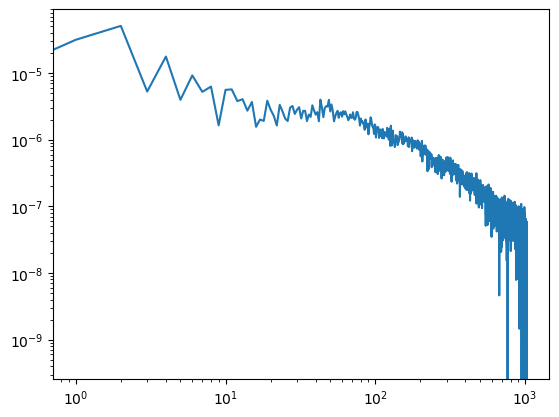

In [12]:
plt.loglog(np.array(dust_obs_cl_slow).reshape(-1))

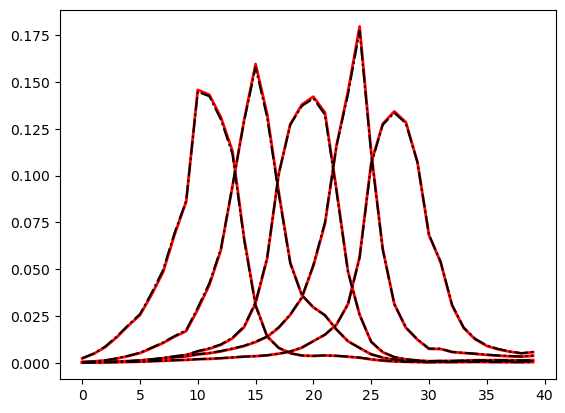

In [13]:
plt.plot(dust_quick.photoz_shell_nzs().T/sum(dust_quick.photoz_shell_nzs().T), linewidth = 2, color = "red")
plt.plot(dust_completed.photoz_shell_nzs().T/sum(dust_completed.photoz_shell_nzs().T), "-.", color = "black")

In [14]:
np.shape(photoz_shell_nz_clean)

(40,)

/var/folders/70/bvfmjsy92zj0p5ppl_zym_2m0000gp/T/ipykernel_59374/3952744127.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((Cl_dust-dust_obs_cl_slow)/Cl_dust)[20:])
/var/folders/70/bvfmjsy92zj0p5ppl_zym_2m0000gp/T/ipykernel_59374/3952744127.py:17: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((Cl_dust-dust_obs_cl_quick)/Cl_dust)[20:])


(20.0, 1024.0)

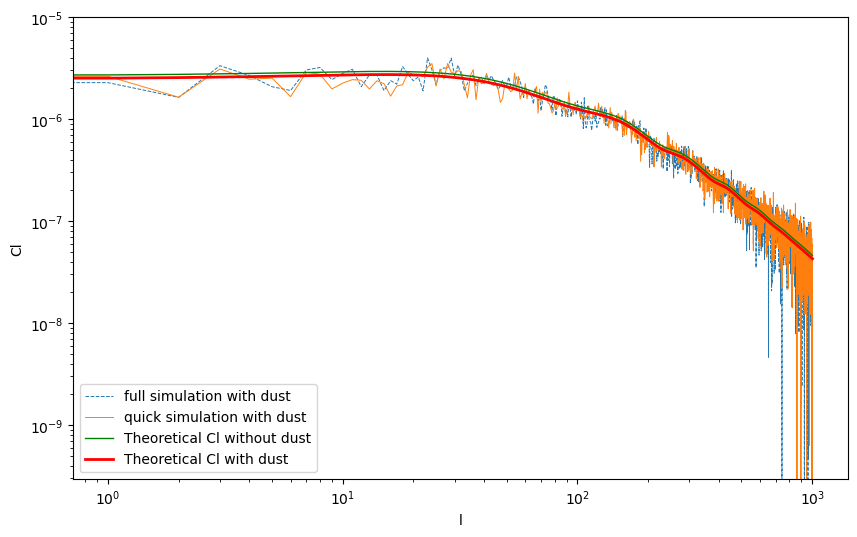

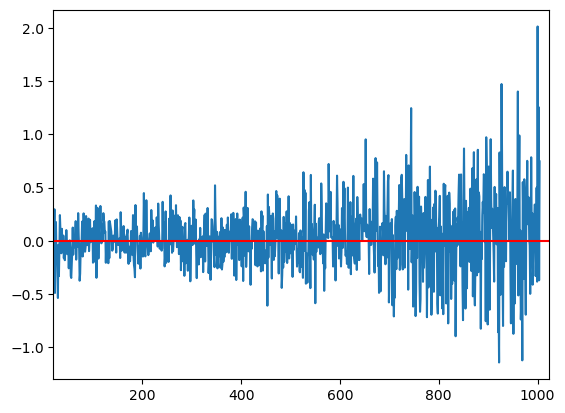

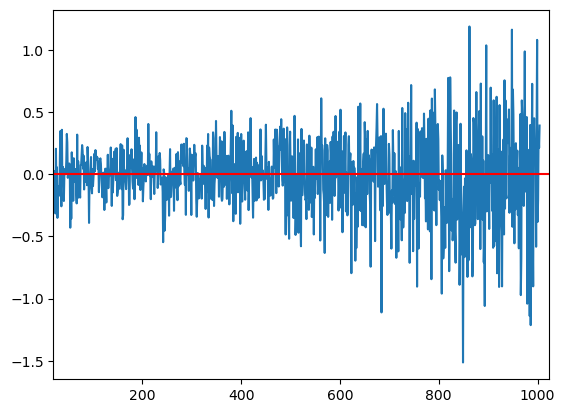

In [15]:
plt.figure(figsize=(10,6))
plt.loglog(dust_obs_cl_slow[20:],"--", label = "full simulation with dust", linewidth=0.7)
plt.loglog(dust_obs_cl_quick[20:], label = "quick simulation with dust", linewidth=0.7)
plt.loglog(Cl_clean[20:], label = "Theoretical Cl without dust", linewidth=1, color="green")
plt.loglog(Cl_dust[20:], label = "Theoretical Cl with dust", linewidth=2, color = "red")
plt.ylim([None,1e-5])
plt.xlabel("l")
plt.ylabel("Cl")
plt.legend()

plt.figure()
plt.plot(((Cl_dust-dust_obs_cl_slow)/Cl_dust)[20:])
plt.hlines(y= 0, xmin=0,xmax=1024, colors="red")
plt.xlim([20,1024])

plt.figure()
plt.plot(((Cl_dust-dust_obs_cl_quick)/Cl_dust)[20:])
plt.hlines(y= 0, xmin=0,xmax=1024, colors="red")
plt.xlim([20,1024])

/var/folders/70/bvfmjsy92zj0p5ppl_zym_2m0000gp/T/ipykernel_59374/1783978642.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((Cl_clean-dust_obs_cl_slow)/Cl_clean)[20:])
/var/folders/70/bvfmjsy92zj0p5ppl_zym_2m0000gp/T/ipykernel_59374/1783978642.py:21: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((Cl_clean-dust_obs_cl_quick)/Cl_clean)[20:])
/var/folders/70/bvfmjsy92zj0p5ppl_zym_2m0000gp/T/ipykernel_59374/1783978642.py:27: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((Cl_clean-clean_obs_cl_slow)/Cl_clean)[20:],alpha = 1)


(20.0, 1024.0)

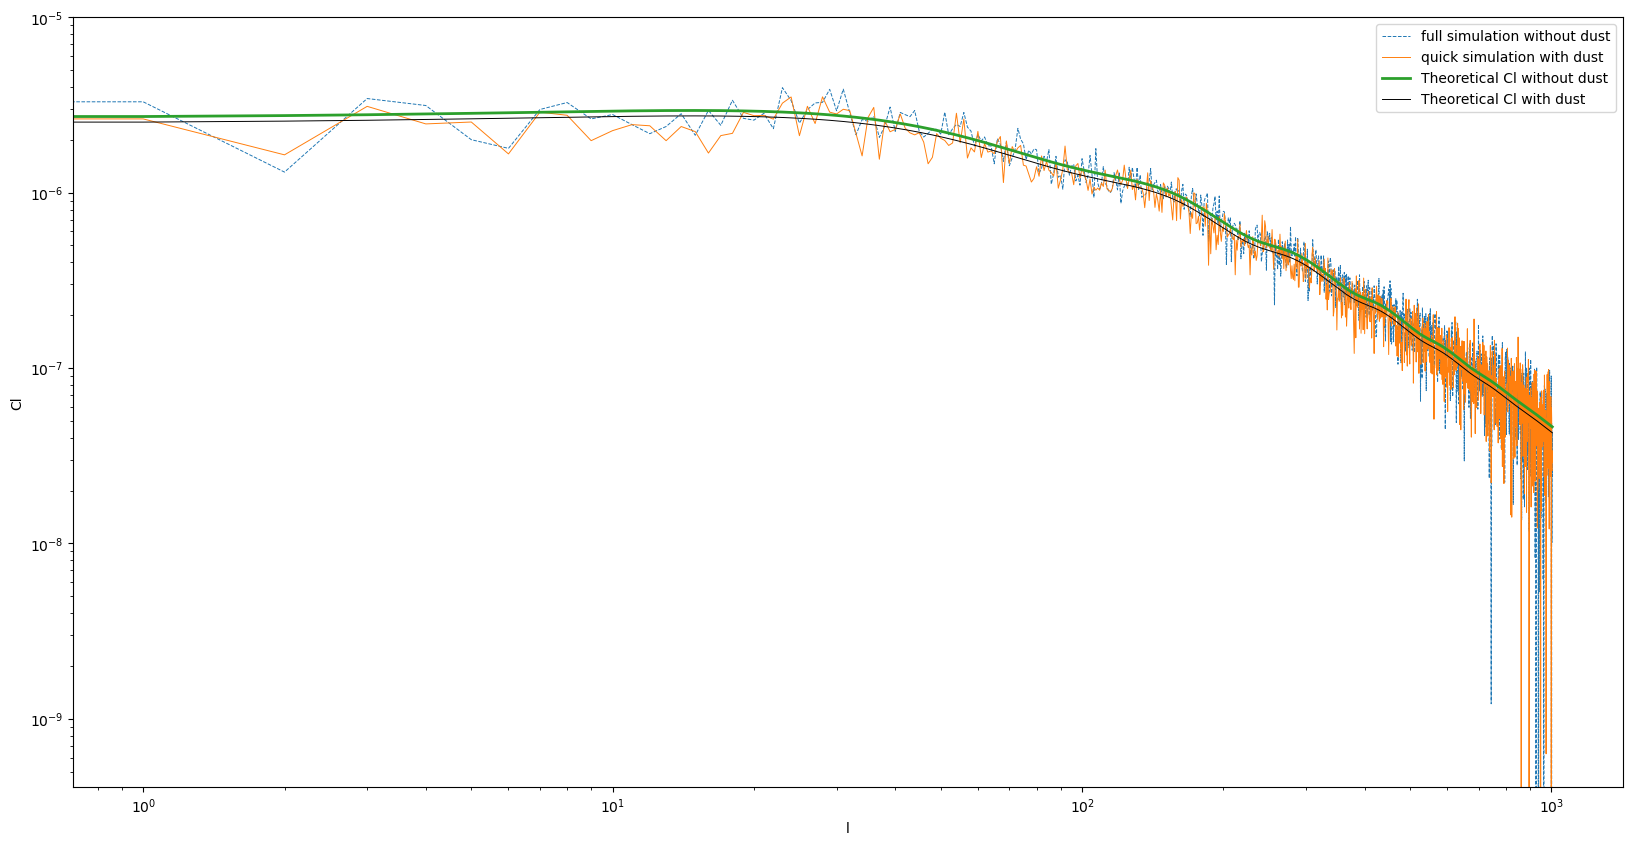

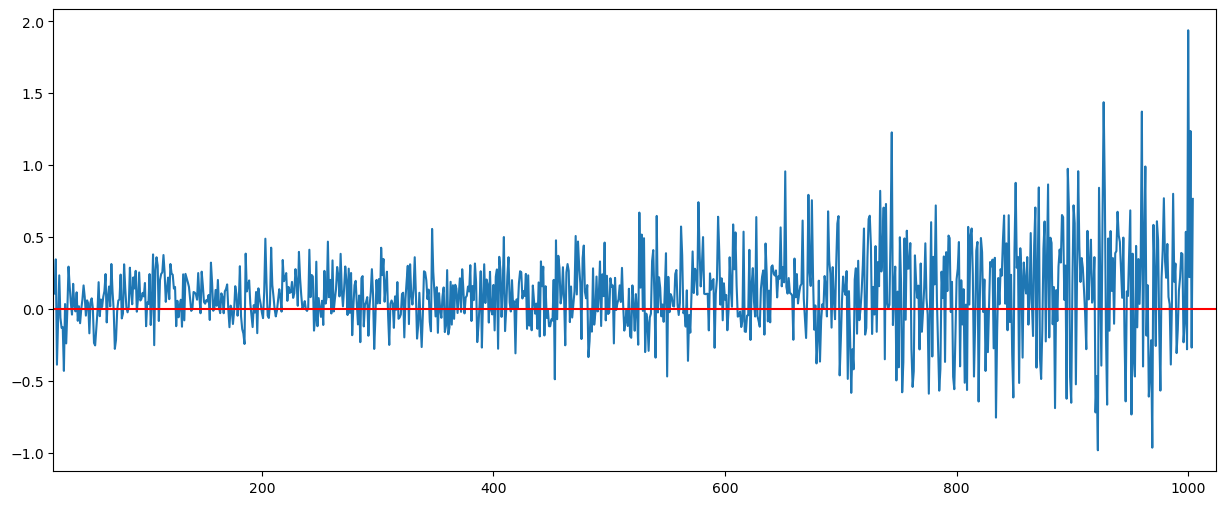

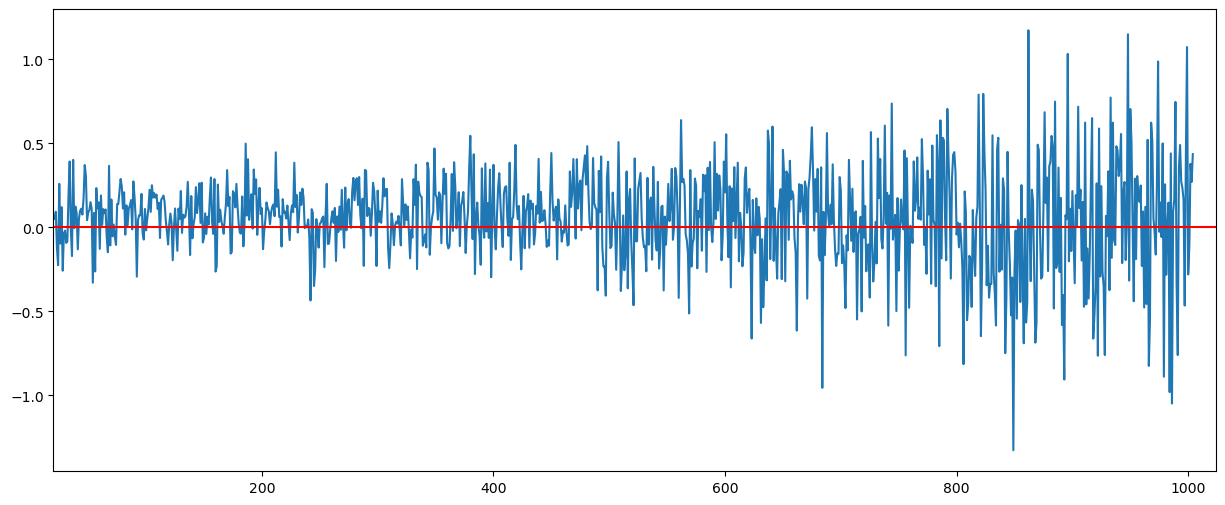

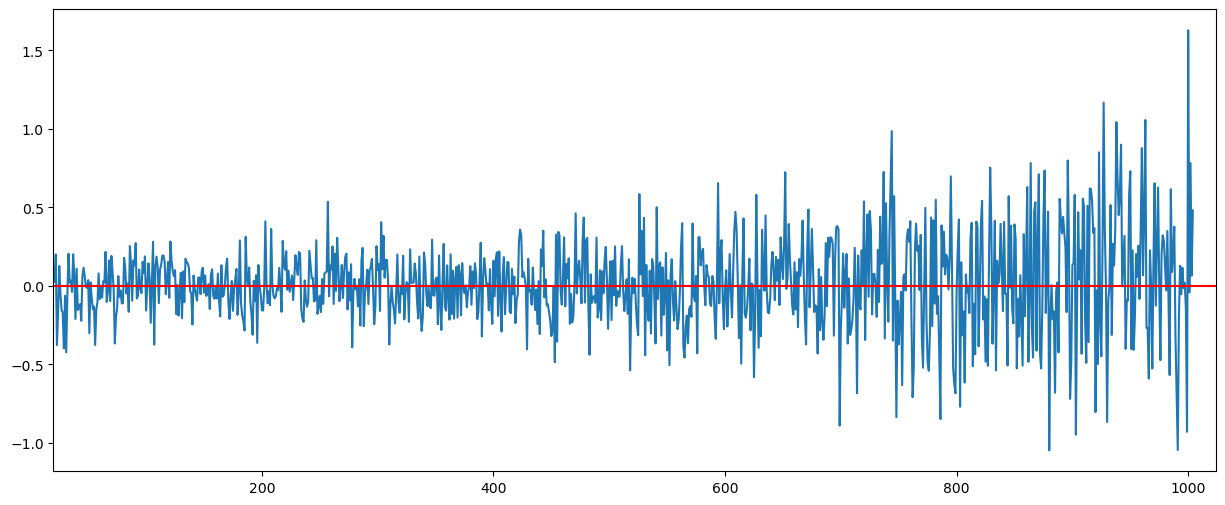

In [16]:
plt.figure(figsize=(20,10))
plt.loglog(clean_obs_cl_slow[20:],"--", label = "full simulation without dust", linewidth=0.7)
plt.loglog(dust_obs_cl_quick[20:], label = "quick simulation with dust", linewidth=0.7)
plt.loglog(Cl_clean[20:], label = "Theoretical Cl without dust", linewidth=2)
plt.loglog(Cl_dust[20:], label = "Theoretical Cl with dust", linewidth=0.7, color = "black")
plt.ylim([None,1e-5])
plt.xlabel("l")
plt.ylabel("Cl")
plt.legend()

plt.figure(figsize=(15,6))
plt.plot(((Cl_clean-dust_obs_cl_slow)/Cl_clean)[20:])
#plt.plot(((Cl_clean-clean_obs_cl_slow)/Cl_clean)[20:],alpha = 1)
plt.hlines(y= 0, xmin=0,xmax=1024, colors="red")
plt.xlim([20,1024])

plt.figure(figsize=(15,6))



plt.plot(((Cl_clean-dust_obs_cl_quick)/Cl_clean)[20:])
#plt.plot(((Cl_clean-clean_obs_cl_slow)/Cl_clean)[20:],alpha = 1)
plt.hlines(y= 0, xmin=0,xmax=1024, colors="red")
plt.xlim([20,1024])

plt.figure(figsize=(15,6))
plt.plot(((Cl_clean-clean_obs_cl_slow)/Cl_clean)[20:],alpha = 1)
plt.hlines(y= 0, xmin=0,xmax=1024, colors="red")
plt.xlim([20,1024])